Задача №1    
    Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

С использованием intercept

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np. array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [114]:
b1 = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks)) / (np.mean(zp**2)-np.mean(zp)**2)
b1

2.620538882402765

In [115]:
b0 = np.mean(ks) - b1*np.mean(zp)
b0

444.1773573243596

In [116]:
y = b0 + b1*zp
y

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

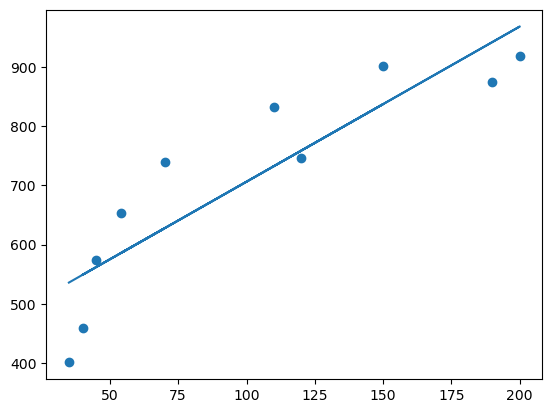

In [117]:
plt.scatter(zp, ks)
plt.plot(zp, b1*zp+b0)

С использованием intercept Матричный метод

In [118]:
zp1 = zp.reshape((len(zp), 1))
zp1

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [119]:
ks1 = ks.reshape((len(ks), 1 ))
ks1

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [120]:
s = np.hstack([np.ones((len(zp), 1)), zp1])
s

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [121]:
m = np.dot(np.linalg.inv(np.dot(s.T, s)), s.T @ ks1)
m

array([[444.17735732],
       [  2.62053888]])

Без использования intercept Матричный метод

In [122]:
f = np.dot(np.linalg.inv(np.dot(zp1.T, zp1)), zp1.T @ ks1)
f

array([[5.88982042]])

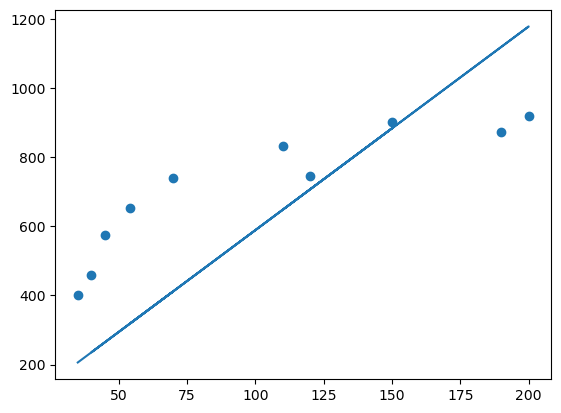

In [123]:
plt.scatter(zp1, ks1)
plt.plot(zp1, zp1*f)

Задача №2  
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [156]:
def mse_(w1, ks = ks, zp = zp, n = 10):
    return np.sum((w1*ks) - zp)**2 /n


In [157]:
alpha = 1e-6
n = 10

In [158]:
w1 = 0.1
for i in range(1000):
    w1 -= alpha * (2/n) * np.sum((w1 * zp - ks) *  zp)
    if i % 100 == 0:
        print(f'w1 = {w1}, i = {i}, mse = {mse_(w1):.2f}')



w1 = 0.25952808, i = 0, mse = 68622.97
w1 = 5.54537842245223, i = 100, mse = 147092510.40
w1 = 5.868748638669329, i = 200, mse = 165227995.05
w1 = 5.888531320728348, i = 300, mse = 166371672.99
w1 = 5.8897415574471985, i = 400, mse = 166441767.32
w1 = 5.889815595583751, i = 500, mse = 166446055.93
w1 = 5.889820124983314, i = 600, mse = 166446318.30
w1 = 5.889820402076462, i = 700, mse = 166446334.35
w1 = 5.88982041902807, i = 800, mse = 166446335.33
w1 = 5.889820420065112, i = 900, mse = 166446335.39


Задача №3  
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [163]:
def mse1_(w0, w1, ks = ks, zp = zp, n = 10):
    return np.sum((w0 + w1*ks) - zp)**2 /n

In [164]:
alpha = 1e-5
n = 10
w1 = 0.1
w0 = 0.1

In [168]:
for i in range(1000):
    w1 -= alpha * (2/n) * np.sum((w1 * zp - ks) *  zp)
    w0 -= alpha * (2/n) * np.sum((w1 * zp - ks))
    if i % 100 == 0:
        print(f'w0 = {w0}, w1 = {w1}, i = {i}, mse = {mse1_(w1, w0):.2f}')

w0 = 0.13138221286165883, w1 = 4.294889333823904, i = 0, mse = 147.22
w0 = 0.36523129322775266, w1 = 5.889820420132673, i = 100, mse = 268197.99
w0 = 0.5905757120248436, w1 = 5.889820420132688, i = 200, mse = 1048072.76
w0 = 0.8159201308219346, w1 = 5.889820420132688, i = 300, mse = 2339768.36
w0 = 1.0412645496190256, w1 = 5.889820420132688, i = 400, mse = 4143284.79
w0 = 1.2666089684161166, w1 = 5.889820420132688, i = 500, mse = 6458622.06
w0 = 1.4919533872132076, w1 = 5.889820420132688, i = 600, mse = 9285780.17
w0 = 1.7172978060102986, w1 = 5.889820420132688, i = 700, mse = 12624759.10
w0 = 1.9426422248073896, w1 = 5.889820420132688, i = 800, mse = 16475558.88
w0 = 2.1679866436044803, w1 = 5.889820420132688, i = 900, mse = 20838179.48
